# Visualisation of politicians_tweets_stats.csv

This notebook provides visualisations for the different metrics provided in politicians_tweets_stats.csv
The data in this file represents the tweets of 555 german politicians from the year 2020.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [2]:
df_tweets_stats = pd.read_csv('politicians_tweets_stats.csv')

## Analysis based on political parties

### Prepare data

In [3]:
parties = df_tweets_stats['party'].unique()
print(parties)

party_colors = {
    'SPD': 'red',
    'CDU': 'black',
    'AfD': 'blue',
    'FDP': 'yellow',
    'Bündnis 90/Die Grünen': 'green',
    'Die Linke': 'purple',
    'CSU': 'lightblue',
    'Fraktionslos': 'grey'
}

['CDU' 'SPD' 'Bündnis 90/Die Grünen' 'CSU' 'Die Linke' 'Fraktionslos'
 'FDP' 'AfD']


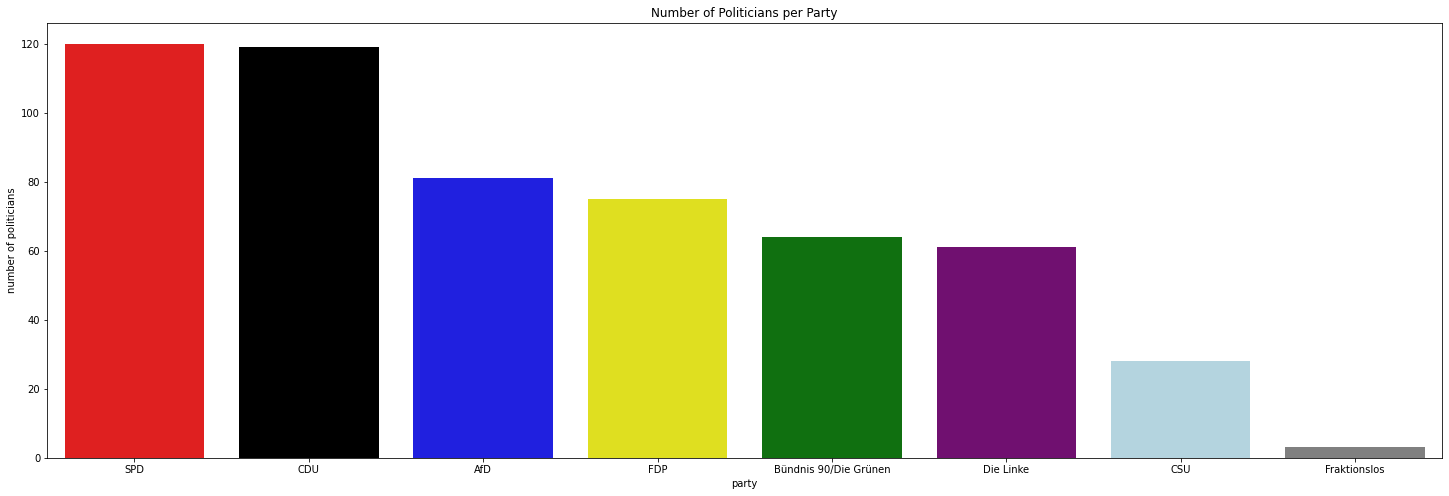

In [4]:
fig = plt.figure(figsize=(25, 8))
chart = sns.countplot(data=df_tweets_stats,
                      x='party',
                      order=df_tweets_stats['party'].value_counts().index,
                      palette=party_colors)
chart.set(ylabel='number of politicians',
          title='Number of Politicians per Party')
plt.show()

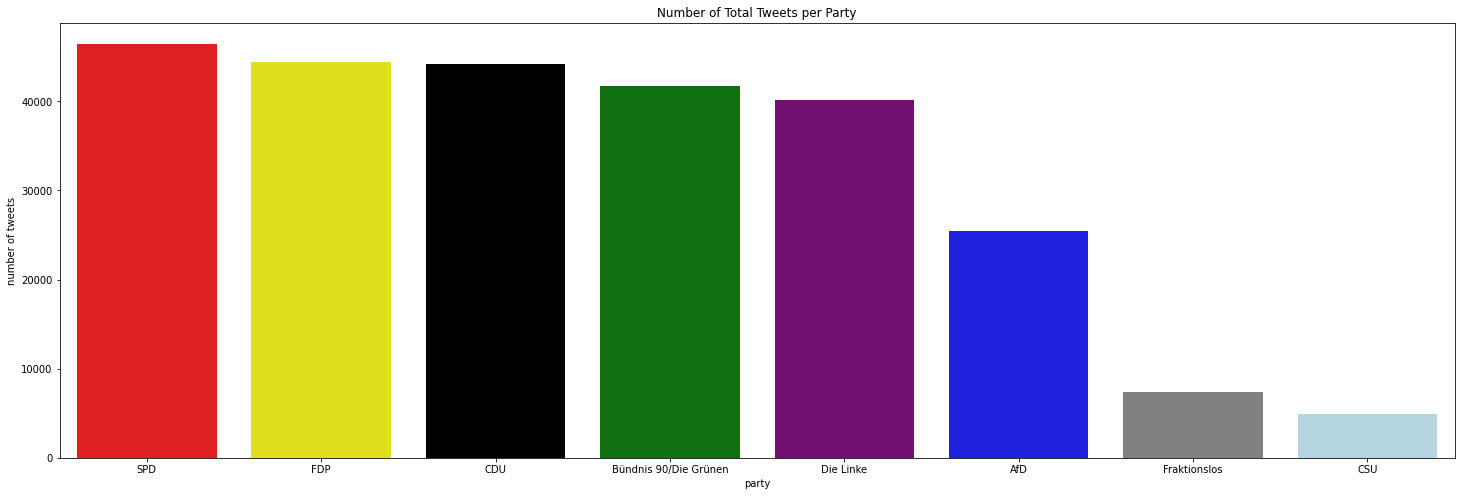

In [5]:
df_tweets_per_party = df_tweets_stats[['party','tweets_by_politician']].groupby(['party']).sum()
df_tweets_per_party.reset_index(inplace=True)
df_tweets_per_party = df_tweets_per_party.rename(columns={'tweets_by_politician': 'tweets_per_party'})
fig = plt.subplots(figsize=(25, 8))
chart = sns.barplot(data=df_tweets_per_party,
                    x='party',
                    y='tweets_per_party',
                    order=df_tweets_per_party.sort_values('tweets_per_party', ascending=False).party,
                    palette=party_colors)
chart.set(ylabel='number of tweets',
          title='Number of Total Tweets per Party')
plt.show()

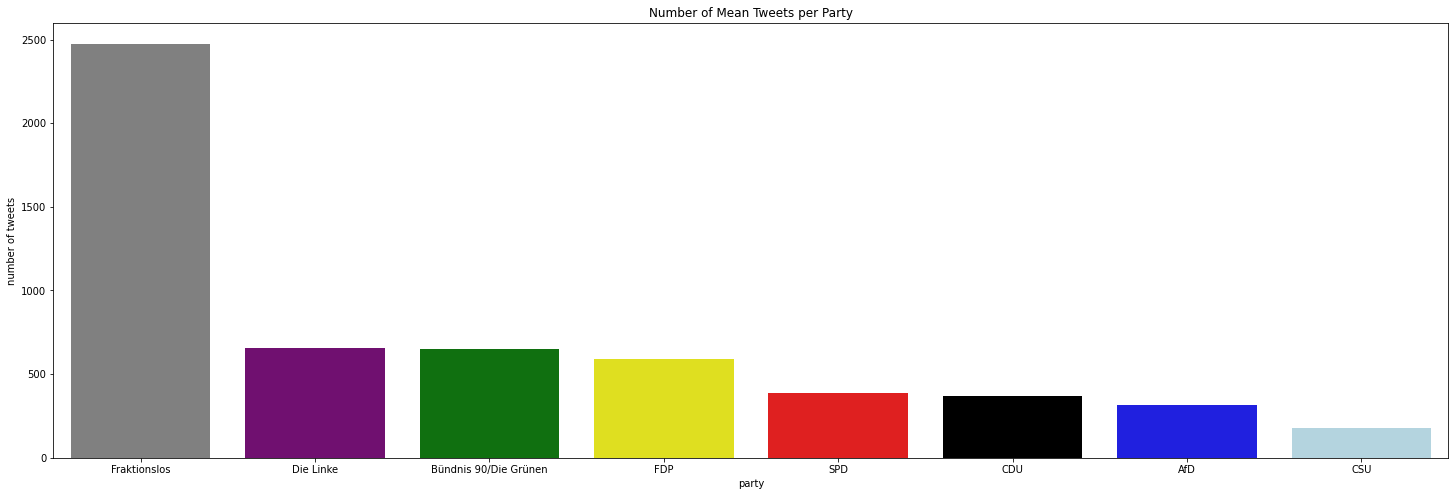

In [6]:
df_tweets_per_party = df_tweets_stats[['party','tweets_by_politician']].groupby(['party']).mean()
df_tweets_per_party.reset_index(inplace=True)
df_tweets_per_party = df_tweets_per_party.rename(columns={'tweets_by_politician': 'tweets_per_party'})
fig = plt.subplots(figsize=(25, 8))
chart = sns.barplot(data=df_tweets_per_party,
                    x='party',
                    y='tweets_per_party',
                    order=df_tweets_per_party.sort_values('tweets_per_party', ascending=False).party,
                    palette=party_colors)
chart.set(ylabel='number of tweets',
          title='Number of Mean Tweets per Party')
plt.show()

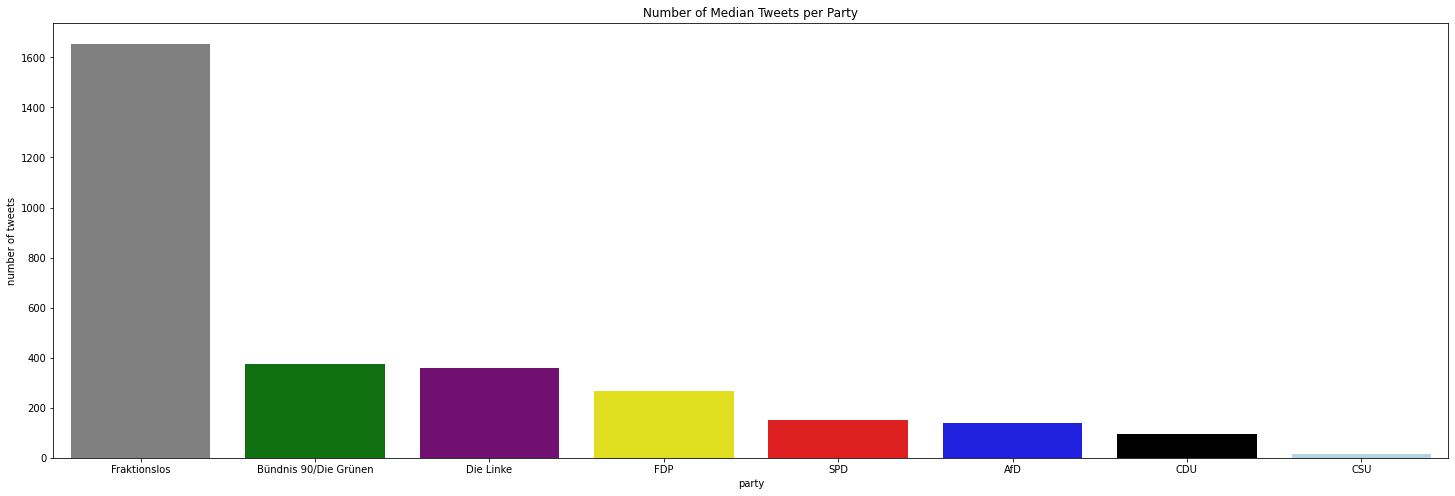

In [7]:
df_tweets_per_party = df_tweets_stats[['party','tweets_by_politician']].groupby(['party']).median()
df_tweets_per_party.reset_index(inplace=True)
df_tweets_per_party = df_tweets_per_party.rename(columns={'tweets_by_politician': 'tweets_per_party'})
fig = plt.subplots(figsize=(25, 8))
chart = sns.barplot(data=df_tweets_per_party,
                    x='party',
                    y='tweets_per_party',
                    order=df_tweets_per_party.sort_values('tweets_per_party', ascending=False).party,
                    palette=party_colors)
chart.set(ylabel='number of tweets',
          title='Number of Median Tweets per Party')
plt.show()

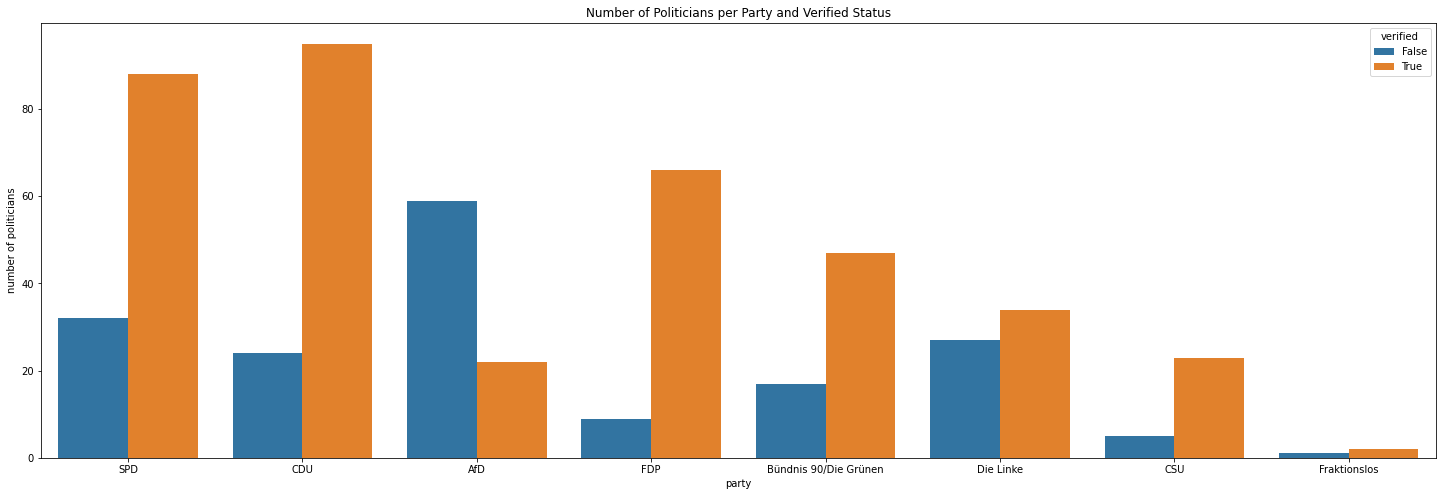

In [8]:
fig = plt.figure(figsize=(25, 8))
chart = sns.countplot(data=df_tweets_stats,
                      x='party',
                      hue='verified',
                      order = df_tweets_stats['party'].value_counts().index)
chart.set(ylabel='number of politicians',
          title='Number of Politicians per Party and Verified Status')
plt.show()

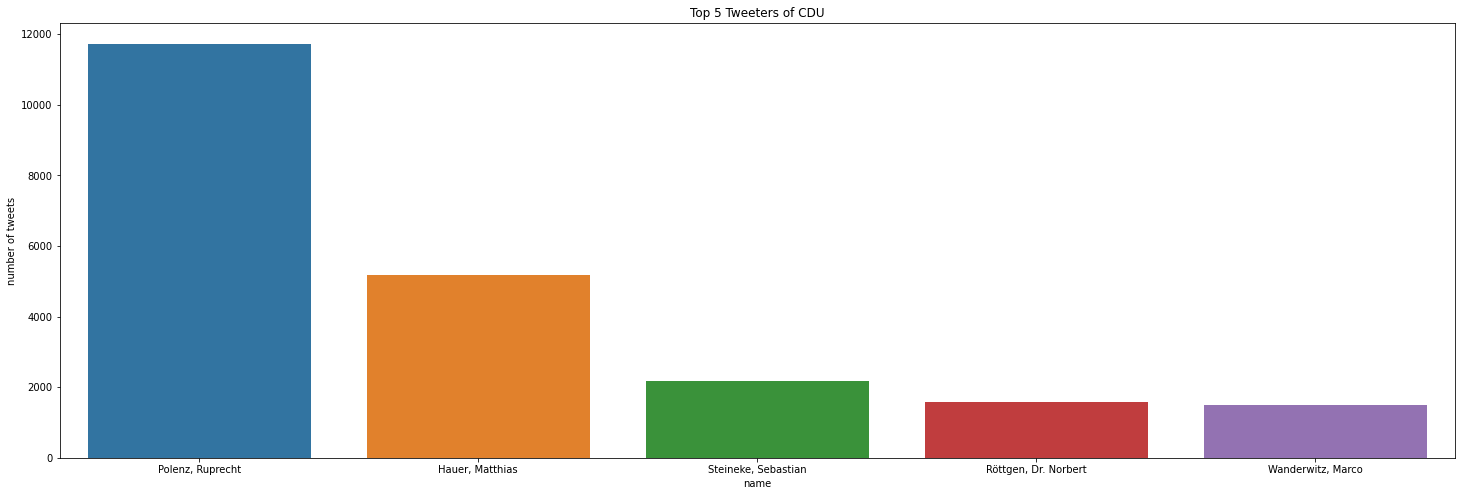

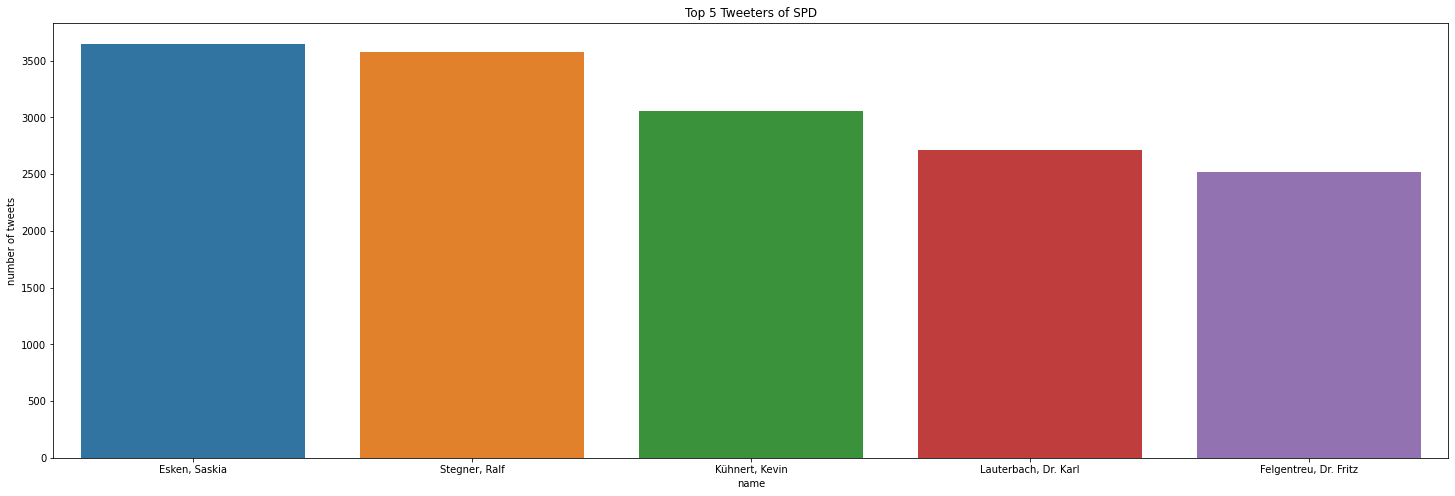

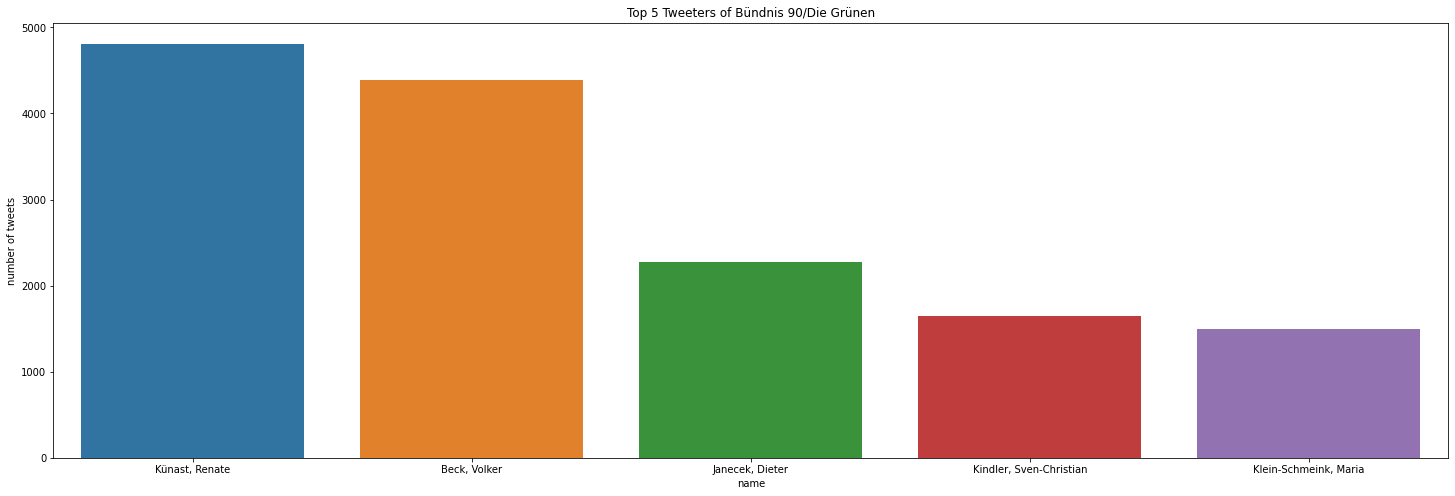

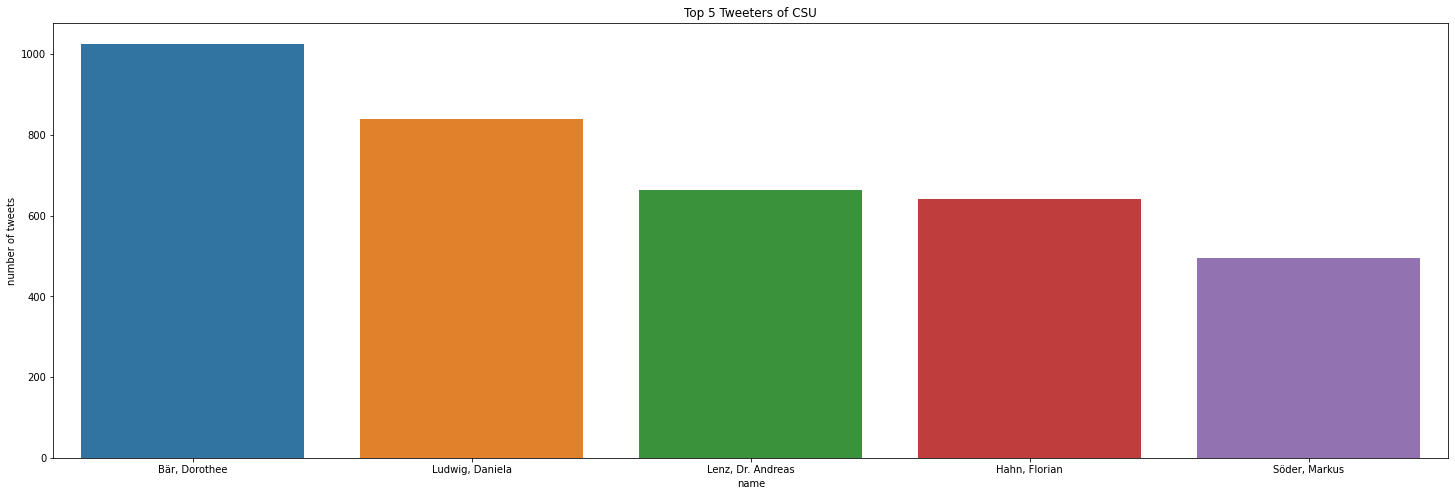

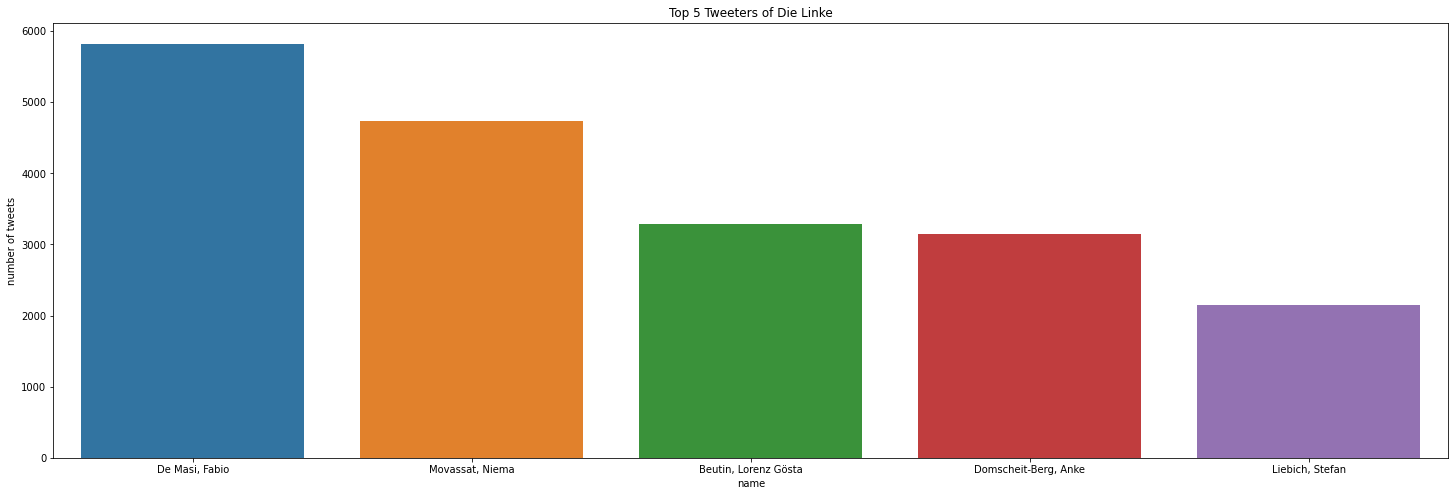

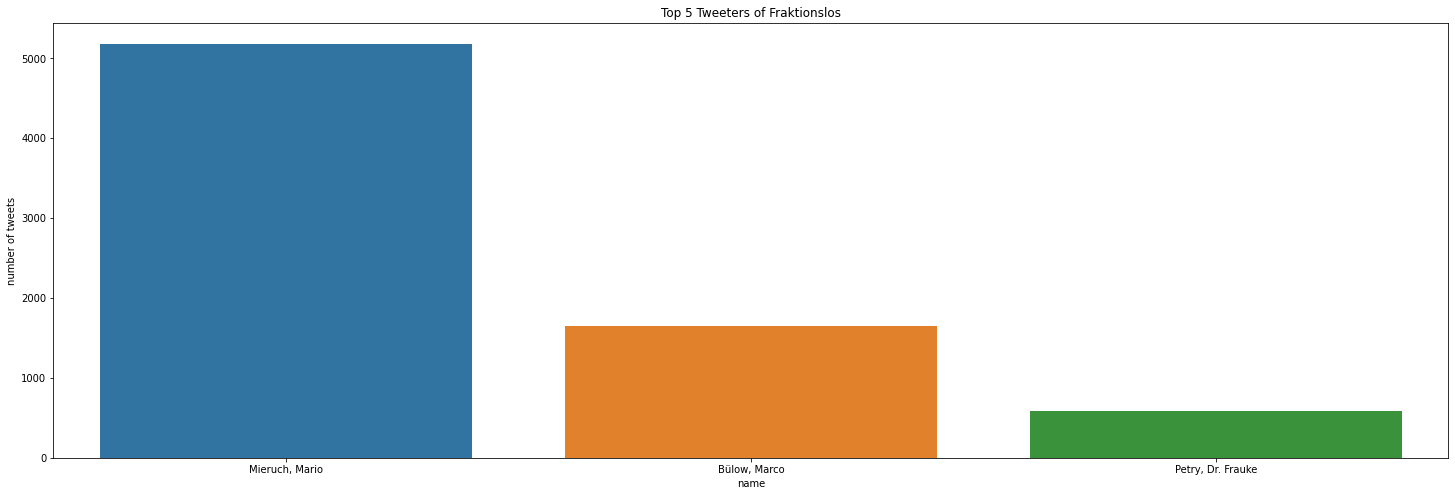

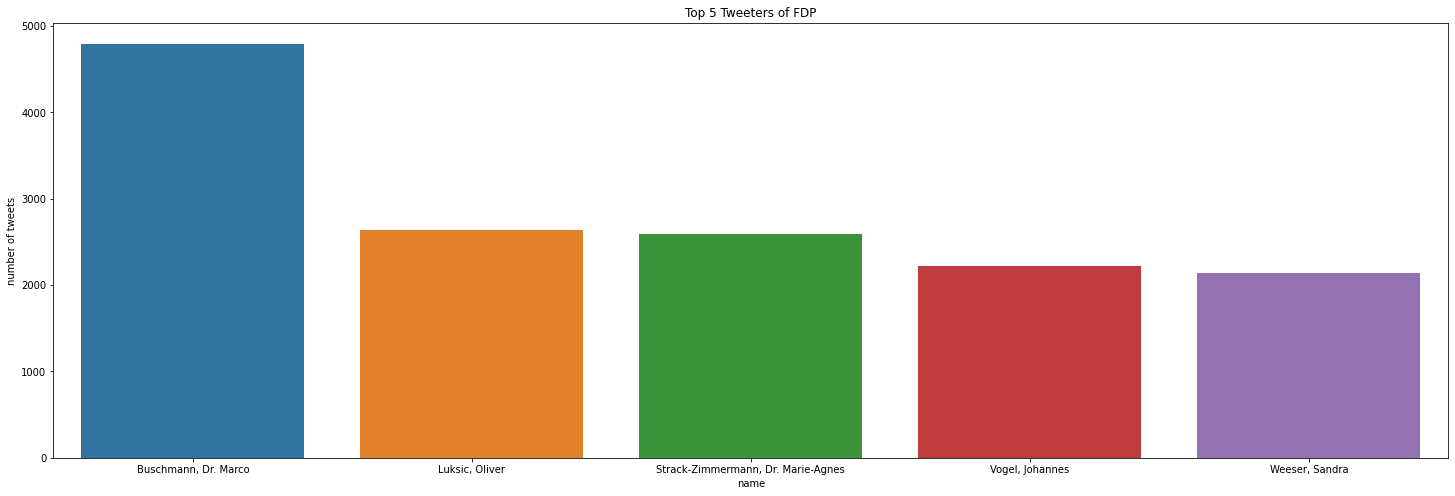

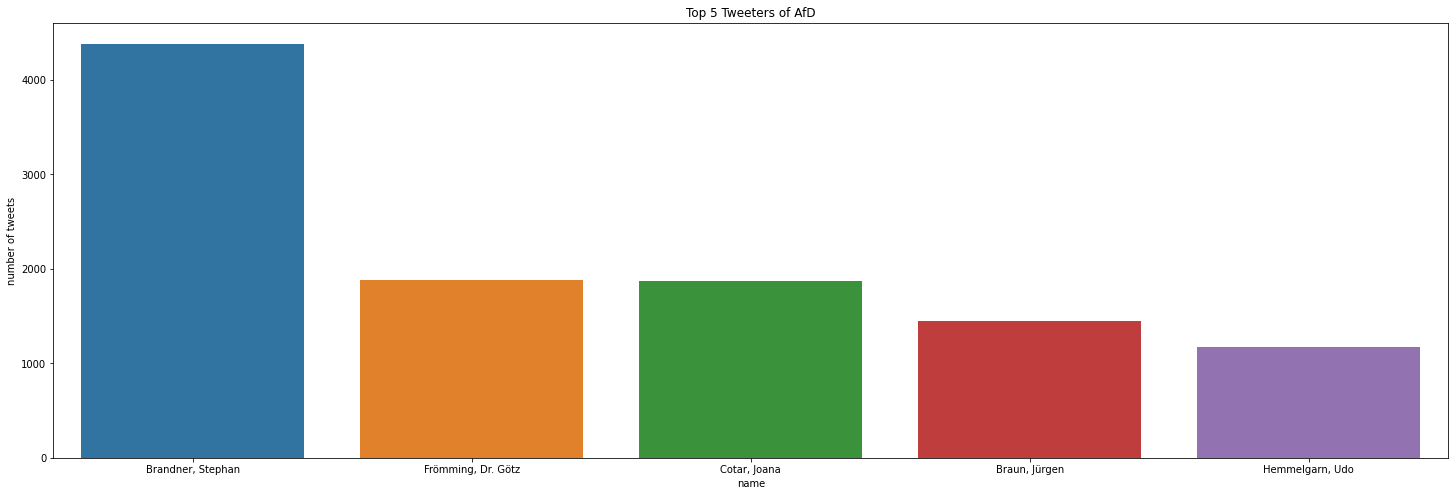

In [9]:
number_of_top_tweeters = 5
for p in parties:
    politicians_per_party = df_tweets_stats[df_tweets_stats['party'] == p].sort_values(by='tweets_by_politician', ascending=False).head(number_of_top_tweeters)
    fig = plt.figure(figsize=(25, 8))
    chart = sns.barplot(data=politicians_per_party,
                        x='name',
                        y='tweets_by_politician')
    chart.set(ylabel='number of tweets',
              title=f'Top {number_of_top_tweeters} Tweeters of {p}')
    plt.show()

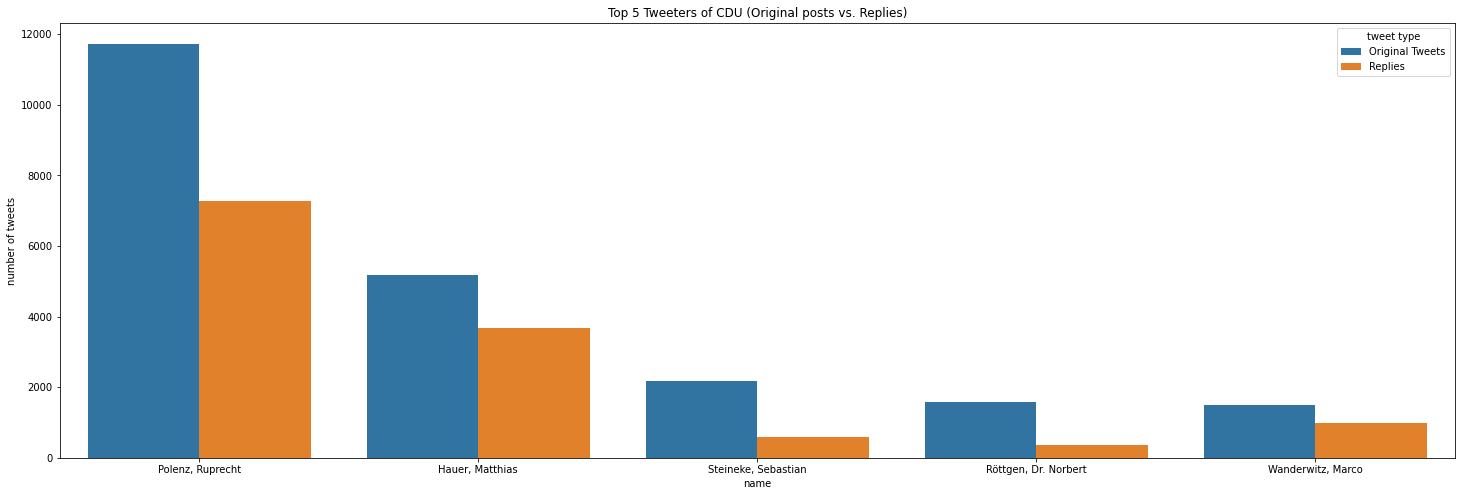

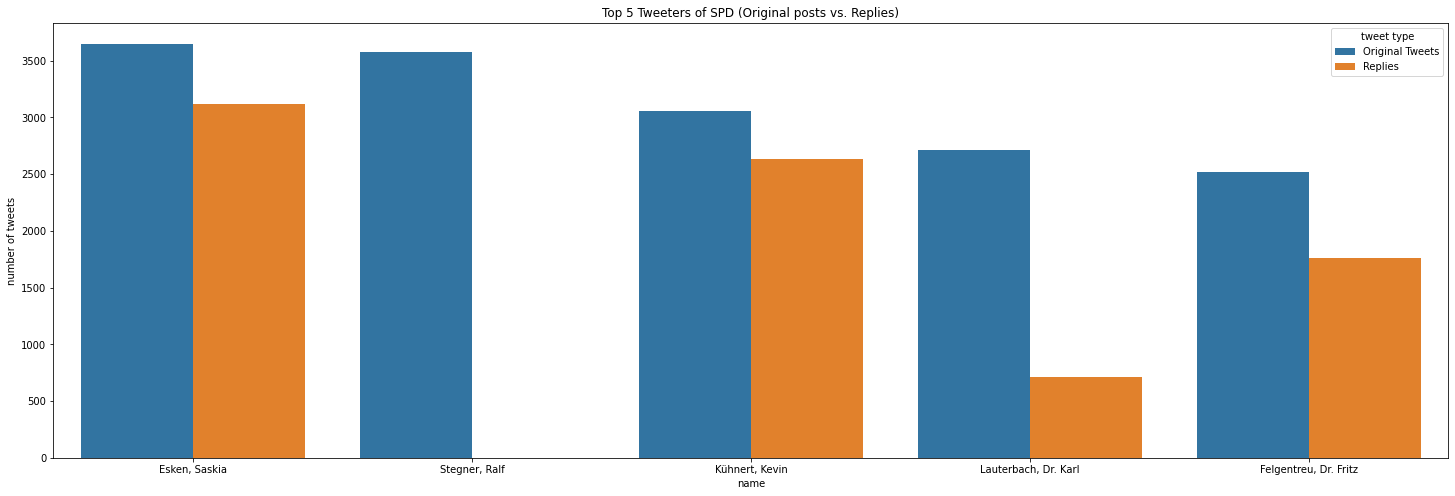

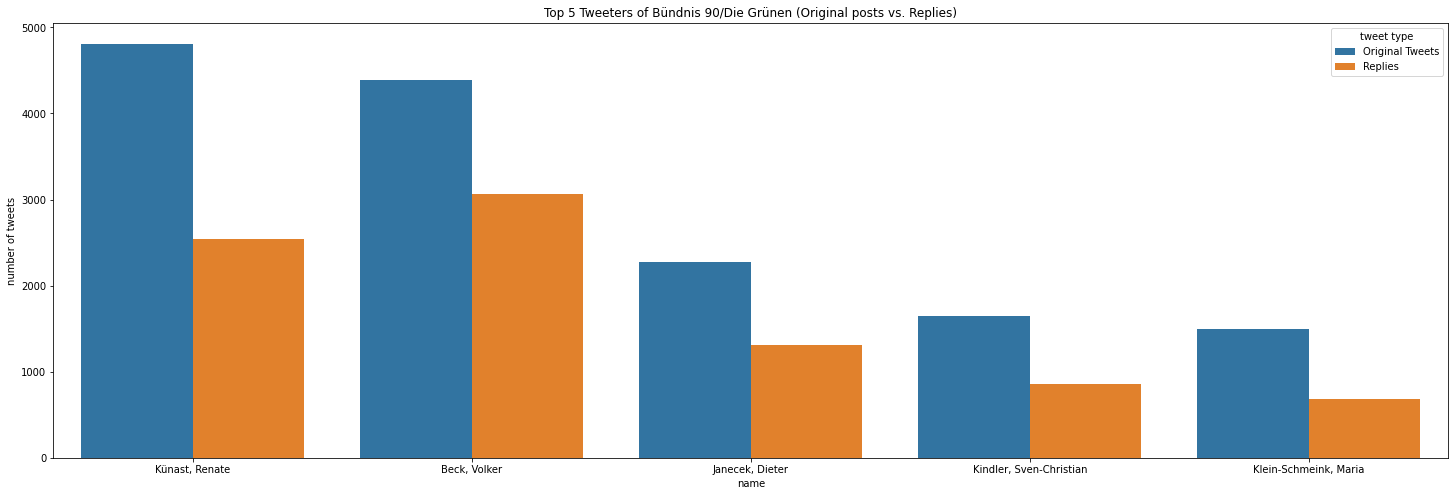

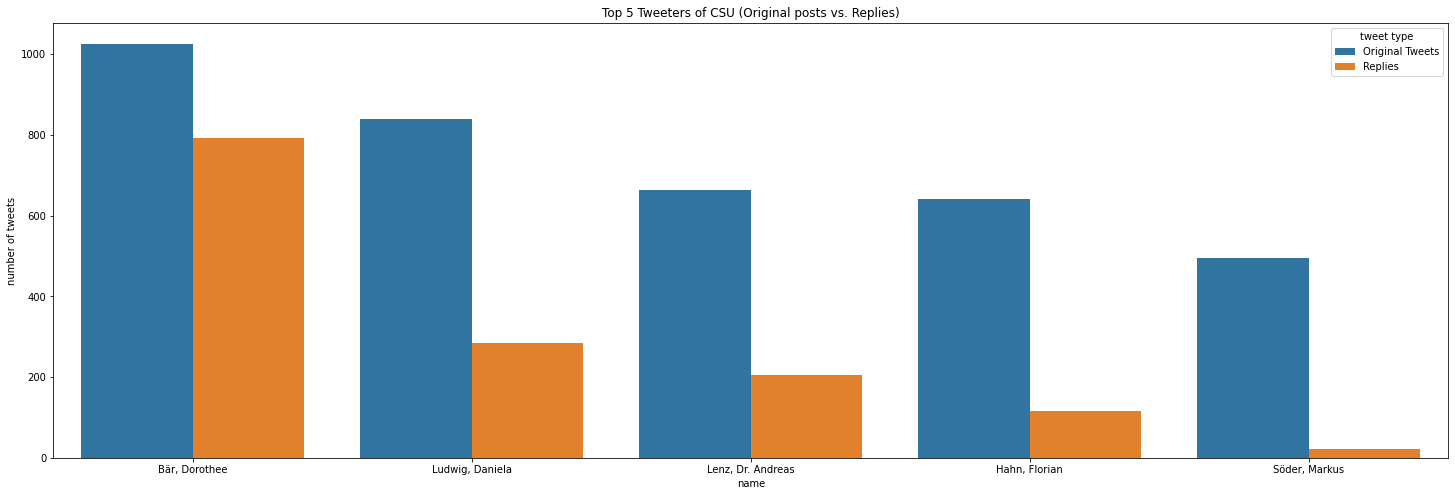

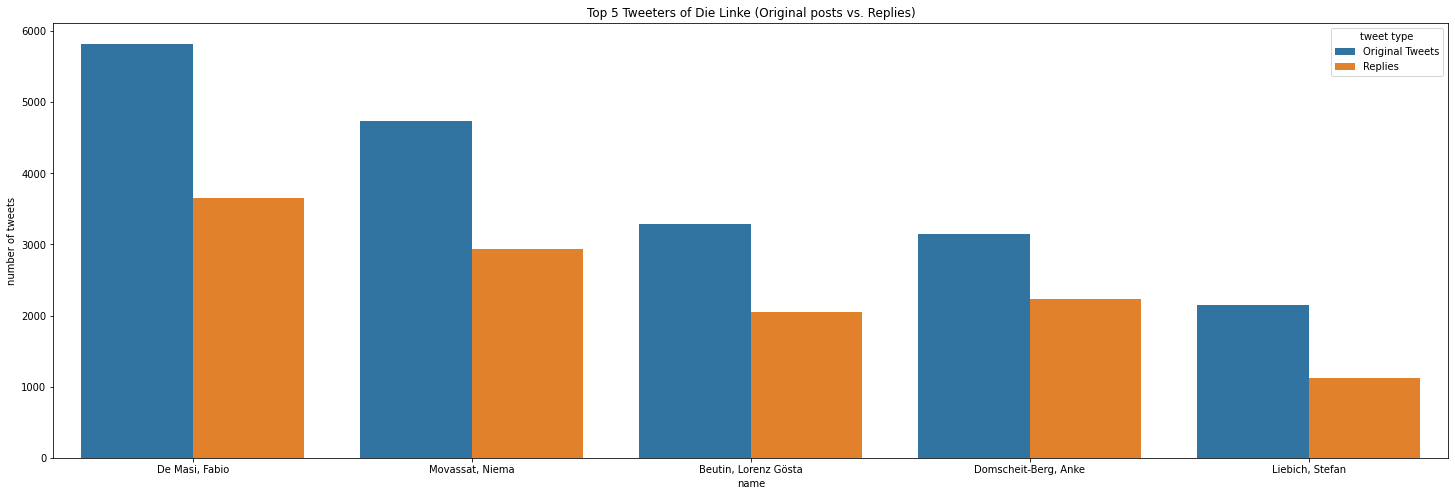

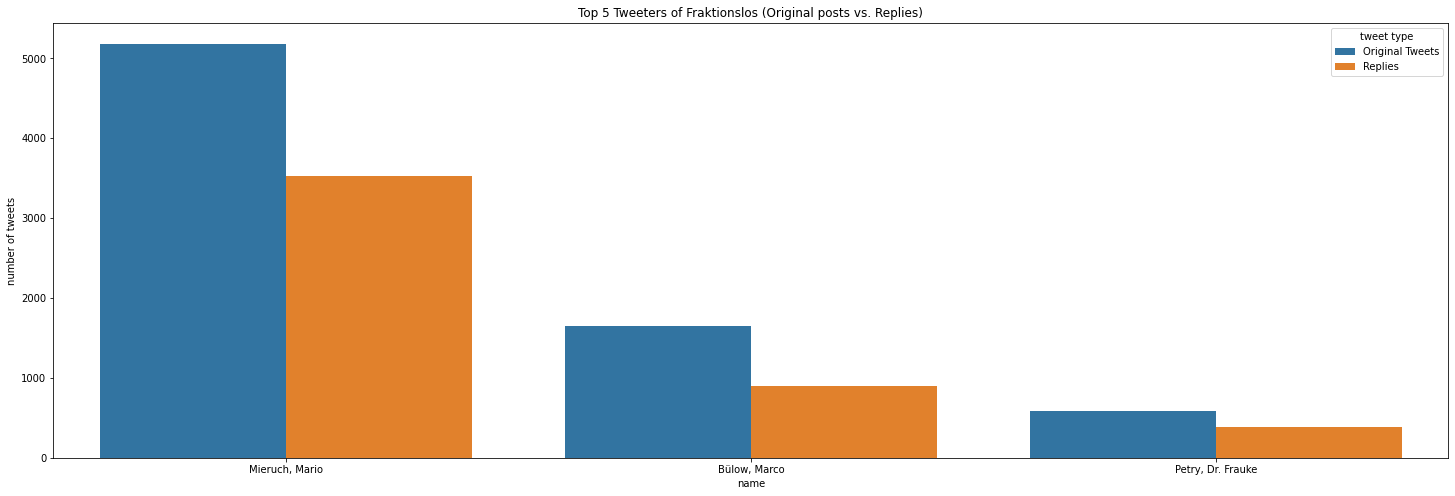

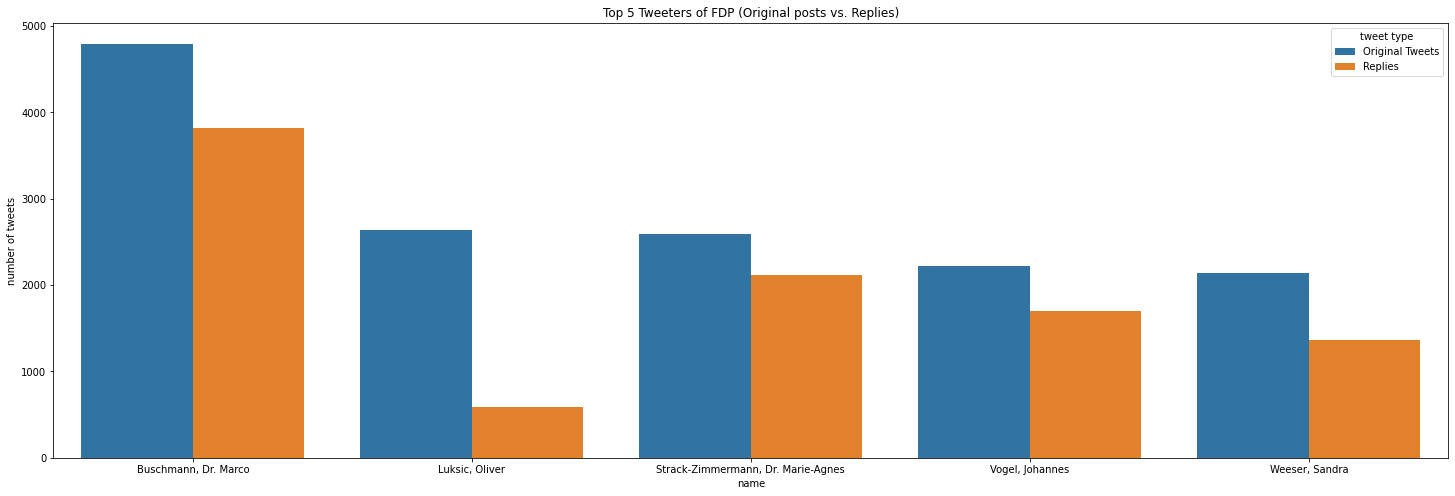

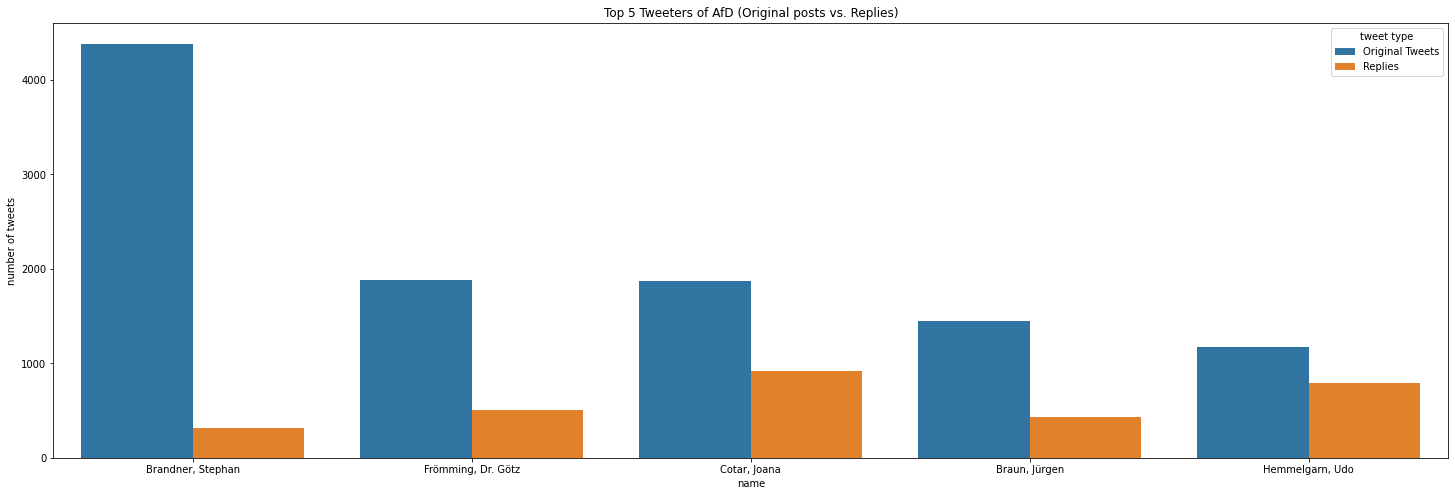

In [25]:
number_of_top_tweeters = 5
for p in parties:
    politicians_per_party = df_tweets_stats[df_tweets_stats['party'] == p].sort_values(by='tweets_by_politician', ascending=False).head(number_of_top_tweeters)
    politicians_per_party = politicians_per_party[['name', 'tweets_by_politician', 'replies_by_politician']]
    politicians_per_party = politicians_per_party.rename(columns={'tweets_by_politician': 'Original Tweets', 'replies_by_politician': 'Replies'})
    politicians_per_party = politicians_per_party.melt('name', var_name='tweet type', value_name='count')
    fig = plt.figure(figsize=(25, 8))
    chart = sns.barplot(data=politicians_per_party,
                        x='name',
                        y='count',
                        hue='tweet type')
    chart.set(ylabel='number of tweets',
              title=f'Top {number_of_top_tweeters} Tweeters of {p} (Original posts vs. Replies)')
    plt.show()

In [11]:
from EmbedTweet import EmbedTweet

POLITICIANS_LIST = '../assets/all_politicians.json'
TWEETS_SOURCE_FOLDER = './formated_data/tweet/'
USERS_SOURCE_FOLDER = './formated_data/user/'

def get_user_id(screen_name):
    with open(POLITICIANS_LIST, 'r', encoding='utf-8') as infile:
        f_content = json.load(infile)
        user_id = next((p['id'] for p in f_content if p['screen_name'] == screen_name), None)
        return user_id

def get_most_liked_tweet(screen_name, user_id):
    f_path = os.path.join(TWEETS_SOURCE_FOLDER, f'{screen_name}.json')
    if os.path.isfile(f_path):
        with open(f_path, 'r', encoding='utf-8') as infile:
            f_content = json.load(infile)
            if f_content != []:
                tweets_by_user = [t for t in f_content if t['raw_data']['user_id_str'] == str(user_id)]
                most_liked_tweet = max(tweets_by_user, key=lambda x: x['raw_data']['favorite_count'])
                return most_liked_tweet
    return None

def get_most_retweeted_tweet(screen_name, user_id):
    f_path = os.path.join(TWEETS_SOURCE_FOLDER, f'{screen_name}.json')
    if os.path.isfile(f_path):
        with open(f_path, 'r', encoding='utf-8') as infile:
            f_content = json.load(infile)
            if f_content != []:
                tweets_by_user = [t for t in f_content if t['raw_data']['user_id_str'] == str(user_id)]
                most_retweeted_tweet = max(tweets_by_user, key=lambda x: x['raw_data']['retweet_count'])
                return most_retweeted_tweet
    return None

def get_most_popular_tweet(screen_name, user_id):
    f_path = os.path.join(TWEETS_SOURCE_FOLDER, f'{screen_name}.json')
    if os.path.isfile(f_path):
        with open(f_path, 'r', encoding='utf-8') as infile:
            f_content = json.load(infile)
            if f_content != []:
                tweets_by_user = [t for t in f_content if t['raw_data']['user_id_str'] == str(user_id)]
                most_retweeted_tweet = max(tweets_by_user, key=lambda x: (x['raw_data']['favorite_count'] + x['raw_data']['retweet_count']))
                return most_retweeted_tweet
    return None

In [12]:
for p in parties:
    top_tweep_per_party = df_tweets_stats[df_tweets_stats['party'] == p].sort_values(by='tweets_by_politician', ascending=False).head(1).iloc[0]
    p_screen_name = top_tweep_per_party['screen_name']
    p_user_id = get_user_id(screen_name=p_screen_name)

    most_liked_tweet = get_most_liked_tweet(screen_name=p_screen_name, user_id=p_user_id)
    most_liked_tweet_url = f'https://twitter.com/{p_screen_name}/status/{most_liked_tweet["id_"]}'
    EmbedTweet(most_liked_tweet_url).display_tweet()

    most_retweeted_tweet = get_most_liked_tweet(screen_name=p_screen_name, user_id=p_user_id)
    if most_retweeted_tweet != most_liked_tweet:
        most_retweeted_tweet_url = f'https://twitter.com/{p_screen_name}/status/{most_retweeted_tweet["id_"]}'
        EmbedTweet(most_retweeted_tweet_url).display_tweet()

    most_popular_tweet = get_most_liked_tweet(screen_name=p_screen_name, user_id=p_user_id)
    if most_popular_tweet != most_liked_tweet or most_popular_tweet != most_retweeted_tweet:
        most_popular_tweet_url = f'https://twitter.com/{p_screen_name}/status/{most_popular_tweet["id_"]}'
        EmbedTweet(most_popular_tweet_url).display_tweet()